# Analyzing Historical Stock/Revenue Data and Building a Dashboard

At this point please ensure you have completed the two previous yfinance and web scraping labs. In this assignment you will upload screenshots of your code and results. You will also be reviewing the submission for one of your peers and grading their work.

As a data scientist working for an investment firm, you will extract the revenue data for Tesla and GameStop and build a dashboard to compare the price of the stock vs the revenue. 

### Grading Criteria Overview

Full Points: Working code that yields correct results

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:


Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

Question 7 - Sharing your Assignment Notebook - 2 Points

For each problem points will be awarded as follows:

Full Points: Working code that yields correct results
Partial Points: Partially correct code or results
No Points: Did not attempt the problem or did not upload any solution

## Peer-graded Assignment

### 1. Extracting Tesla Stock Data Using yfinance

In [ ]:
pip install yfinance

In [1]:
import yfinance as yf 

tesla = yf.Ticker("TSLA") 
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### 2. Extracting Tesla Revenue Data Using Webscrapping 

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find("table")  
revenue_data = pd.read_html(str(table))[0]
revenue_data.columns = ["Date", "Revenue"]
revenue_data["Revenue"] = revenue_data["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)
revenue_data.tail()


,Date,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data_tesla = requests.get(url_tesla).text

soup_tesla = BeautifulSoup(html_data_tesla, "html.parser")

tables = soup_tesla.find_all("table", {"class": "historical_data_table table"})

tesla_revenue_table = tables[1]  # Choose the 2 table

tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)

tesla_revenue.tail()


,Date,Revenue
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-12-31,NaN
52,2009-09-30,46.0
53,2009-06-30,27.0


### 3. Extracting GameStop Stock Data Using yfinance

In [18]:
import yfinance as yf 

gme = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5739,2024-12-02 00:00:00-05:00,28.959999,29.370001,26.750000,27.270000,13576600,0.0,0.0
5740,2024-12-03 00:00:00-05:00,26.549999,27.590000,26.490000,27.440001,6009900,0.0,0.0
5741,2024-12-04 00:00:00-05:00,27.070000,27.830000,26.629999,27.030001,6387500,0.0,0.0
5742,2024-12-05 00:00:00-05:00,27.000000,30.870001,26.150000,28.629999,40704900,0.0,0.0
5743,2024-12-06 00:00:00-05:00,29.120001,29.350000,28.110001,29.059999,15079000,0.0,0.0


### 4. Extracting GameStop Revenue Data Using Webscraping

In [8]:
url_gamestop = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_gamestop = requests.get(url_gamestop).text

soup_gamestop = BeautifulSoup(html_data_gamestop, "html.parser")

gme_tables = soup_gamestop.find_all("table", {"class": "historical_data_table table"})

gme_revenue_table = gme_tables[1]  # Choose 2 table for quarters

gamestop_revenue = pd.read_html(str(gme_revenue_table ))[0]

gamestop_revenue.columns = ["Date", "Revenue"]
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)
gamestop_revenue.dropna(inplace=True)
gamestop_revenue.head()


,Date,Revenue
0,2020-04-30,1021.0
1,2020-01-31,2194.0
2,2019-10-31,1439.0
3,2019-07-31,1286.0
4,2019-04-30,1548.0


### 5. Tesla Stock and Revenue Dashboard 

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

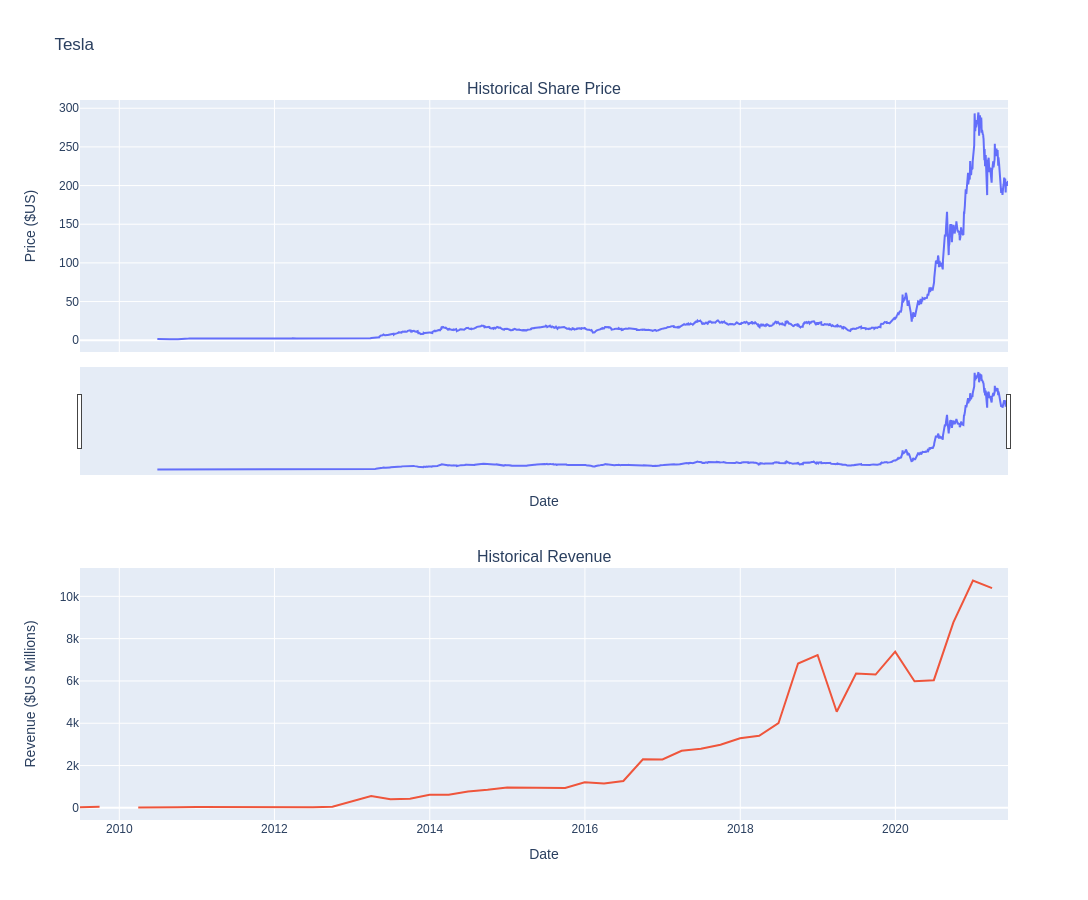

In [16]:
make_graph(tesla_data, tesla_revenue, "Tesla")

### 6. GameStop Stock and Revenue Dashboard

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore User warnings
warnings.filterwarnings("ignore", category=UserWarning)

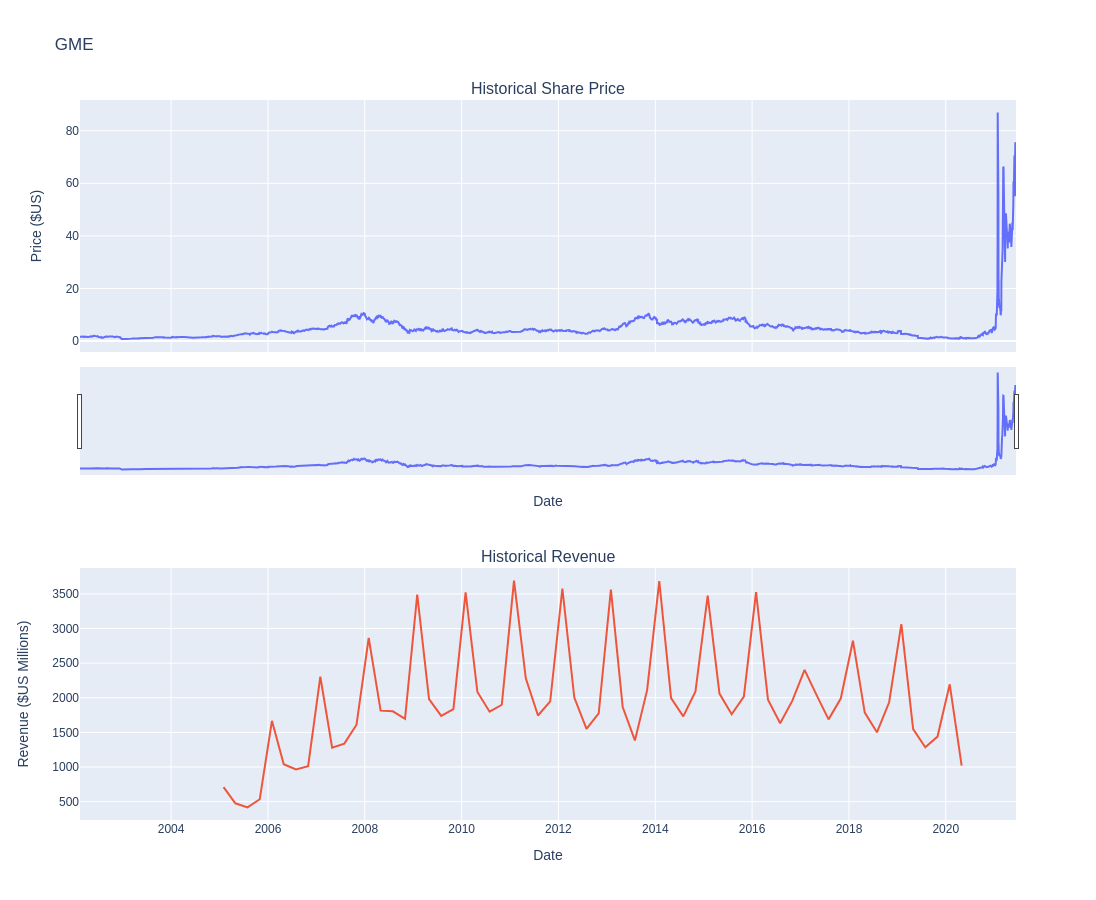

In [13]:
make_graph(gamestop_data, gamestop_revenue, "GME")